In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

df = pd.read_csv('/Users/masc/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [249]:
df.shape

(1338, 7)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [230]:
# check whether we have duplicated entries in the data or not
df.duplicated().sum()

1

In [251]:
df.drop_duplicates(inplace = True)

In [232]:
# To check whether NaN have been replaced or not 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

#### Smoker vs Charges

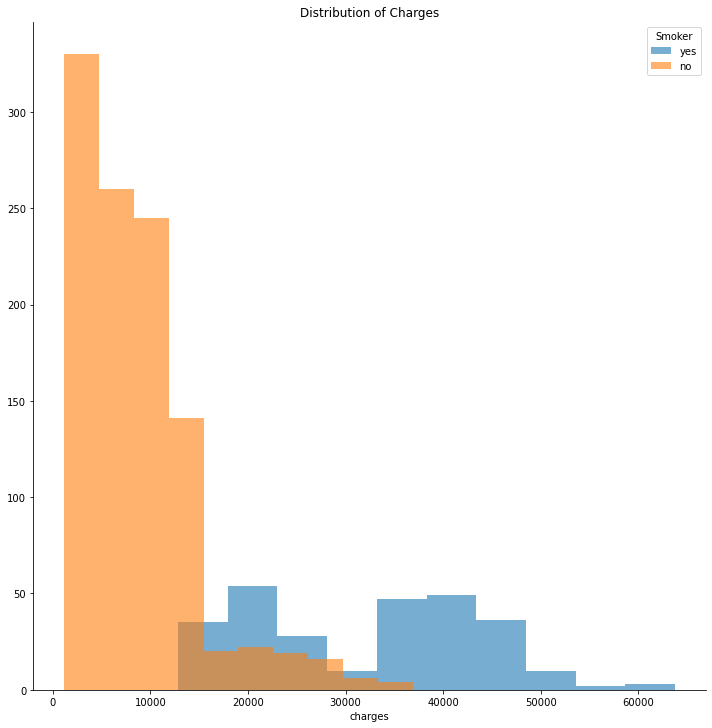

In [261]:
g = sns.FacetGrid(df, hue='smoker', height=10, aspect=1)

g = g.map(plt.hist, 'charges', alpha=0.6)

plt.title('Distribution of Charges')
plt.legend(title='Smoker')
plt.show()

The plot shows that non-smokers generally pay lesser insurance charges compared to smokers.

We can explore deeper to see if there are any other variables that contribute to the difference in charges between smokers and non-smokers.

First, we can plot the charges against age to see if there is a difference in trend

<AxesSubplot:xlabel='age', ylabel='charges'>

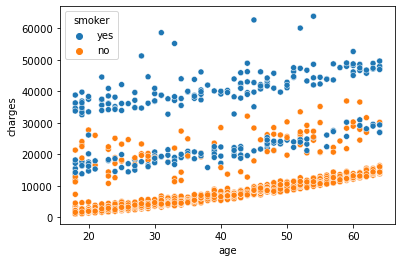

In [191]:
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

From the above plot, we can tell that smokers generally have higher insurance charges compared to non-smokers across all age groups

However, the above plot also shows that there is are two trend lines for smokers. We can dive deeper to see if we can attribute the two trend lines to a single variable.

#### BMI and smoker vs charges

In [193]:
smoker_df = df[df['smoker']=='yes']

In [195]:
def highbmi(bmi):
    
    if bmi >= 30:
        return 'yes'
    
    else:
        return 'no'

smoker_df['highbmi'] = df['bmi'].apply(highbmi)

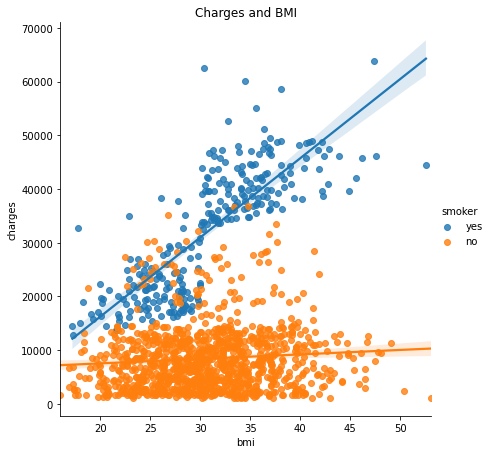

In [197]:
#sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, height=6)
plt.title('Charges and BMI')

plt.show()

From the above plots, we can tell that reason for the two trend lines is probably due to the smoker's BMI.

The plot shows that if a smoker's BMI is above 30, there will be a significant increase in insurance charges.

Summary:

- The age distribution of smokers and non-smokers are relatively the same

- For the same age, smokers generally face higher insurance charges compared to non-smokers

- For the same BMI, smokers generally face higher insurance charges compared to non-smokers

- For smokers, there is a noticable increase in insurance charges if the BMI is 30 and above


#### Region vs charges

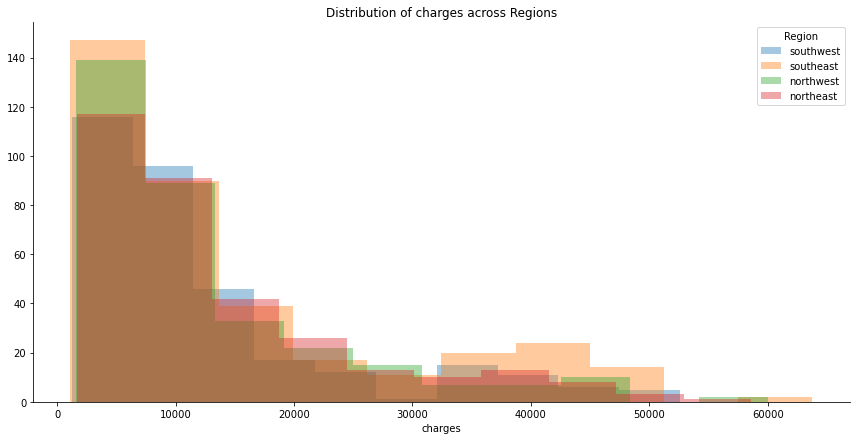

In [263]:
g = sns.FacetGrid(data=df, hue='region', height=6, aspect=2)
g = g.map(plt.hist, 'charges', alpha=0.4)

plt.title('Distribution of charges across Regions')
plt.legend(title='Region')

plt.show()

From the above plots, region does not seem to be a contributing factor in insurance charges.

####  Smokers and non-smokers VS other variables

<AxesSubplot:>

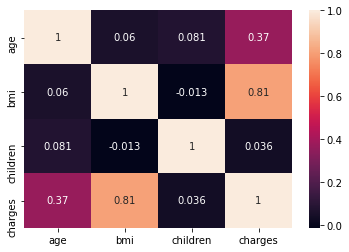

In [199]:
sns.heatmap(smoker_df.corr(), annot=True)

In [200]:
non_smoker_df = df[df['smoker']=='no']

<AxesSubplot:>

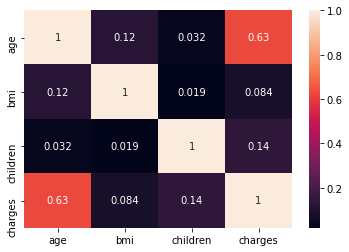

In [202]:
sns.heatmap(non_smoker_df.corr(), annot=True)

Based on the correlation heatmaps:

- For smokers, age and BMI appears to be correlated with the insurance charges, with BMI having a higher correlation compared to age

- For non-smokers, only age seems to be correlated with the insurance charges. In addition, the age correlation appears to be higher compared to non-smokers 

Hence:

- For smokers, BMI and age appears to be a major contributing factor to insurance charges
- For non-smokers, age appears to be the only major contributing factor to insurance charges

#### Gender, age, and smoker vs charges

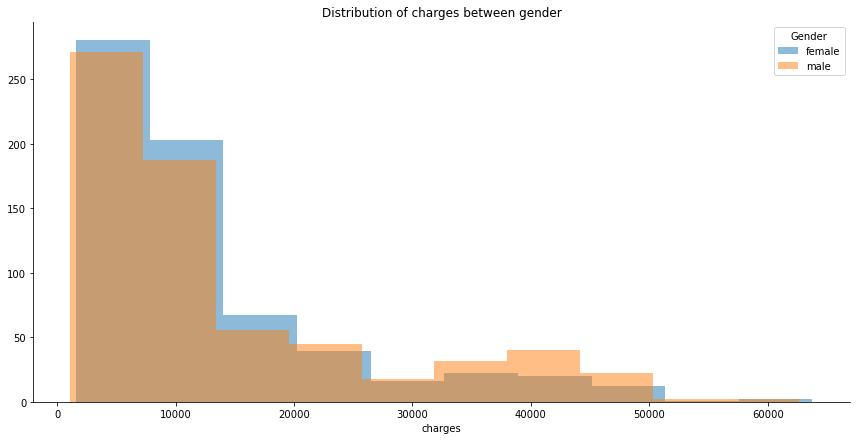

In [203]:
g = sns.FacetGrid(df, hue='sex', height=6, aspect=2)
g = g.map(plt.hist, 'charges', alpha=0.5)

plt.title('Distribution of charges between gender')
plt.legend(title='Gender')
plt.show()

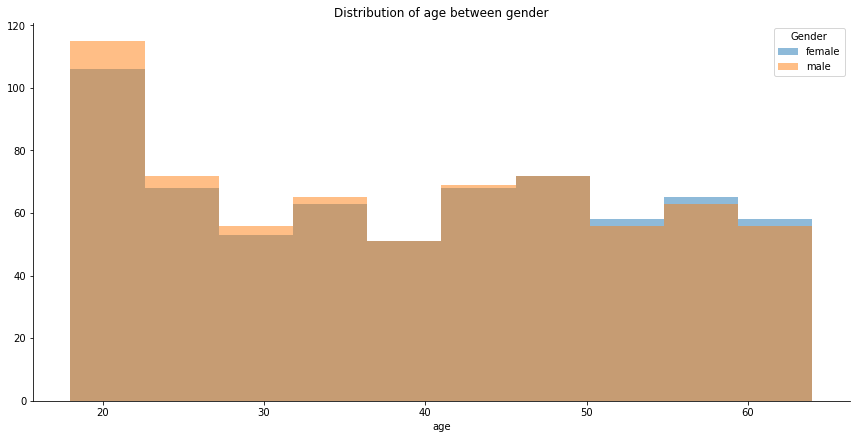

In [204]:
g = sns.FacetGrid(df, hue='sex', height=6, aspect=2)
g = g.map(plt.hist, 'age', alpha=0.5)

plt.title('Distribution of age between gender')
plt.legend(title='Gender')
plt.show()

From the plots above, we can determine that

- The age and charges distribution are similar between males and females
- There is a small difference in counts for smokers and non-smokers between genders. There are more males who are smokers, and more females that are non-smokers

####  Number of children VS charges

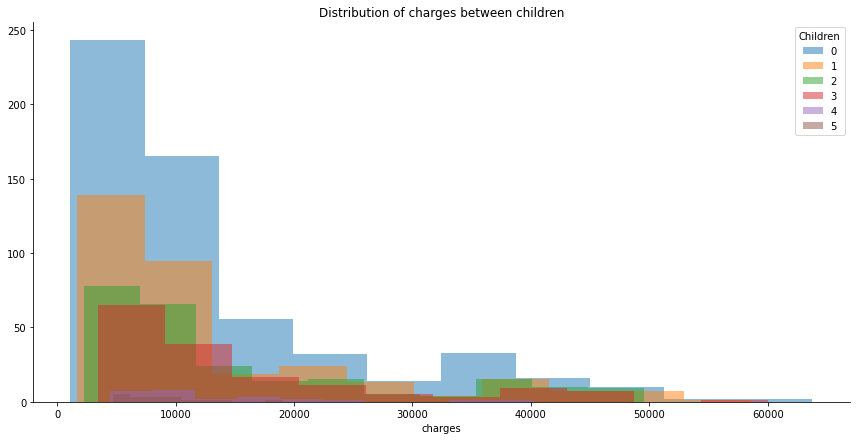

In [265]:
g = sns.FacetGrid(df, hue='children', height=6, aspect=2)
g = g.map(plt.hist, 'charges', alpha=0.5)

plt.title('Distribution of charges between children')
plt.legend(title='Children')
plt.show()

From the plots above, we can tell that the number of children does not appear to have a significant impact on the insurance charges

### Feature Engineering

In [266]:
# Categorical Data Encoding using One-Hot vs. Label Encoding


# Label Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


for i in cat_list:
    df[i] = LabelEncoder().fit_transform(df[i])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


      age  sex     bmi  children  smoker  region      charges  log_charges
0      19    0  27.900         0       1       3  16884.92400    14.043534
1      18    1  33.770         1       0       2   1725.55230    10.753678
2      28    1  33.000         3       0       2   4449.46200    12.119739
3      33    1  22.705         0       0       1  21984.47061    14.424263
4      32    1  28.880         0       0       1   3866.85520    11.917318
...   ...  ...     ...       ...     ...     ...          ...          ...
1333   50    1  30.970         3       0       1  10600.54830    13.371987
1334   18    0  31.920         0       0       0   2205.98080    11.107858
1335   18    0  36.850         0       0       2   1629.83350    10.671394
1336   21    0  25.800         0       0       3   2007.94500    10.972222
1337   61    0  29.070         0       1       1  29141.36030    14.830830

[1337 rows x 8 columns]


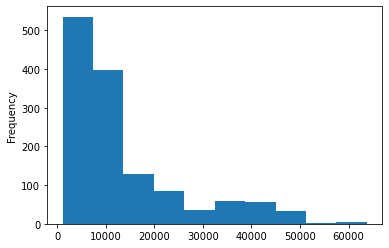

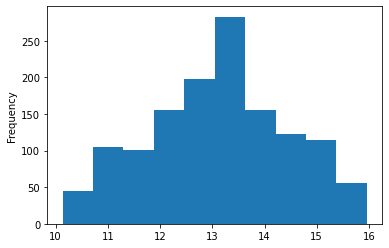

In [267]:
# log transformation

df['log_charges'] = np.log2(df['charges'] +1)


print(df)
df = df.drop(['charges'], axis=1)

### Feature Selection

In [236]:
#Drop unnecessary columns
df = df.drop(['sex', 'region', 'children'], axis=1)

In [237]:
df.head()

,bmi,smoker,log_charges
0,27.900,1,14.043534
1,33.770,0,10.753678
2,33.000,0,12.119739
3,22.705,0,14.424263
4,28.880,0,11.917318


In [241]:
# X - input features matrix
X = df.drop(['log_charges'], axis=1)


# y - output target vector
y = df["log_charges"]

# split into train and test set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(895, 2) (442, 2) (895,) (442,)


### Modeling using Support Vector Regressor from SVM

In [268]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.svm import SVR # for building the model
from sklearn.metrics import mean_absolute_error 



# Initializing the SVR model with 10 decision trees
model = SVR(kernel = 'rbf')

# Fitting the SVR model to the data
model.fit(X_train, y_train.ravel())

# Predicting the results
y_pred = model.predict(X_test)


# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))

# MAE (mean_absolute_zero)
mae = float(format(np.sqrt(mean_absolute_error(y_test, y_pred)), '.3f'))

print("RMSE: ", rmse)
print("MAE : ", mae)



RMSE:  1.193
MAE :  0.977


### SVM SGD

In [273]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle


def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost



def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw


def svr_sgd(features, outputs):
    max_epochs = 500
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
            
    return weights


########################


def init():

    # X - input features matrix
    X = df.drop(['log_charges'], axis=1)

    #  - output target vector
    y = df["log_charges"]
    
    # train the model
    print("training started...")
    W = svr_sgd(X_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print("weights are: {}".format(W))



# set hyper-parameters and call init
regularization_strength = 10000
learning_rate =  0.00001
init()

training started...
Epoch is: 1 and Cost is: 1520.1172542230963
Epoch is: 2 and Cost is: 1493.1491055340962
Epoch is: 4 and Cost is: 1440.6396326674724
Epoch is: 8 and Cost is: 1341.0955389459446
Epoch is: 16 and Cost is: 1162.1667262851827
Epoch is: 32 and Cost is: 872.7419980517786
Epoch is: 64 and Cost is: 492.17636281362013
Epoch is: 128 and Cost is: 156.52744863274347
Epoch is: 256 and Cost is: 15.83178976587682
Epoch is: 499 and Cost is: 0.20439480854239653
training finished.
weights are: [0.63911812 0.01782259]
